# Benefit of Multiplicative (MPL) Models over Nominal (Nom) Models of Systems
Testing actuator selection and feedback of Nominal and MPL models on simulations of True system

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import simulation_model_comparison, plot_simulation_comparison1, plot_simulation_comparison2, actuator_comparison, cost_comparison_print

## Code

In [2]:
test_set = 'System Model 8'
S_True = sys_from_file(test_set + ' C')
S_MPL = sys_from_file(test_set + ' B')
S_Nom = sys_from_file(test_set + ' A')

System read from file @ system_model/System Model 8 C.pickle 

System read from file @ system_model/System Model 8 B.pickle 

System read from file @ system_model/System Model 8 A.pickle 



In [3]:
ret_sim = simulation_model_comparison(S_Nom, S_MPL, S_True)

## Output

#### System Models

##### System C - True System

max(abs(eigvals(A)))= 0.9500


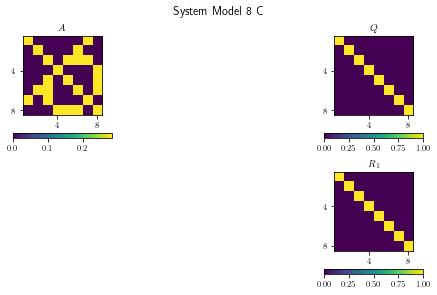

In [4]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(S_True['A'])))))
system_display_matrix(S_True)

##### System A

max(abs(eigvals(A)))= 0.9500


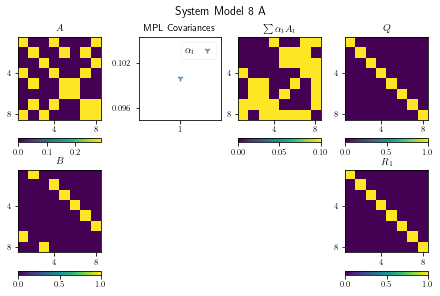

In [5]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_A']['A'])))))
system_display_matrix(ret_sim['system_A'])

##### System B

max(abs(eigvals(A)))= 0.9500


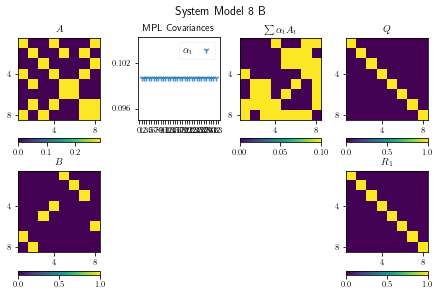

In [6]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_B']['A'])))))
system_display_matrix(ret_sim['system_B'])

#### Simulation - Trajectory, Control Input and Costs

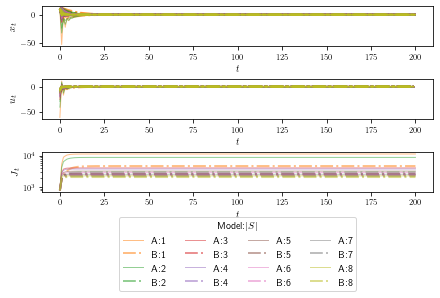

In [7]:
plot_simulation_comparison1(ret_sim)

#### Actuator set comparison

Control sets are different


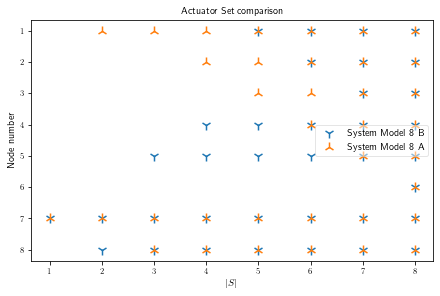

In [8]:
actuator_comparison(ret_sim['system_B'], ret_sim['system_A'], disptext=True, figplt=True);

#### Simulated costs

In [9]:
cost_comparison_print(ret_sim)

True system (System Model 8 C) simulation cost with A (System Model 8 A) and B (System Model 8 B) feedback (4decimal approx)
|S|: 1 | A: 1.1263e+04 | B: 4.6807e+03 | Diff (A-B) 6.5818e+03 (58.44 % of A)
|S|: 2 | A: 8.7757e+03 | B: 2.9425e+03 | Diff (A-B) 5.8332e+03 (66.47 % of A)
|S|: 3 | A: 4.0793e+03 | B: 2.5807e+03 | Diff (A-B) 1.4985e+03 (36.74 % of A)
|S|: 4 | A: 3.7770e+03 | B: 2.5745e+03 | Diff (A-B) 1.2025e+03 (31.84 % of A)
|S|: 5 | A: 3.2357e+03 | B: 2.5384e+03 | Diff (A-B) 6.9730e+02 (21.55 % of A)
|S|: 6 | A: 2.9399e+03 | B: 2.4371e+03 | Diff (A-B) 5.0279e+02 (17.10 % of A)
|S|: 7 | A: 2.5786e+03 | B: 2.2543e+03 | Diff (A-B) 3.2428e+02 (12.58 % of A)
|S|: 8 | A: 2.2895e+03 | B: 2.1016e+03 | Diff (A-B) 1.8786e+02 (8.21 % of A)


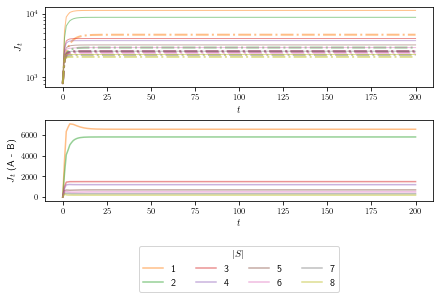

In [10]:
plot_simulation_comparison2(ret_sim)

## Run Complete

In [11]:
print('Run Complete')

Run Complete
